# Trabajo Practico Número 2: Optimización en Grafos
## Maestría Explotación de Datos y Descubrimiento del Conocimiento
### Juan Ignacio Etcheberry Mason
### 25 de Junio de 2019

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import descartes
import itertools
import copy
import sys

%matplotlib inline

Defino una función haversine para estimar la distancia entre dos conjuntos de coordenadas geográficas.

In [2]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

Levanto los datos de la pagina publica del Gobierno de la Ciudad con la ubicación geográfica de las estaciones de bici.

https://data.buenosaires.gob.ar/dataset/estaciones-bicicletas-publicas

In [3]:
df = pd.read_csv('data/estaciones-de-bicicletas-publicas.csv')

print(df.shape)
df.head()

(199, 10)


,long,lat,nombre,domicilio,imagen,automat,observ,nro_est,horario,dire_norm
0,-58.392452,-34.583133,Facultad de Derecho,Av. Pres.Figueroa Alcorta y Juan A.Bibiloni,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),1,Estación automática: disponibilidad las 24 horas,"FIGUEROA ALCORTA, PRES. AV. y BIBILONI, JUAN A."
1,-58.374822,-34.592589,Retiro,Av. Dr.Jose Ramos Mejia y Del Libertador Av,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),2,Estación automática: disponibilidad las 24 horas,"DEL LIBERTADOR AV. y RAMOS MEJIA, JOSE MARIA, ..."
2,-58.368918,-34.611242,Aduana,Av. Ing.Huergo y Av. Belgrano,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),3,Estación automática: disponibilidad las 24 horas,"HUERGO, ING. AV. y BELGRANO AV."
3,-58.368950,-34.601721,Plaza Roma,Lavalle y Bouchard,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),4,Estación automática: disponibilidad las 24 horas,LAVALLE y BOUCHARD
4,-58.369709,-34.628301,Parque Lezama,Av Martín García e Irala,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),6,Estación automática: disponibilidad las 24 horas,"GARCIA, MARTIN AV. e IRALA"


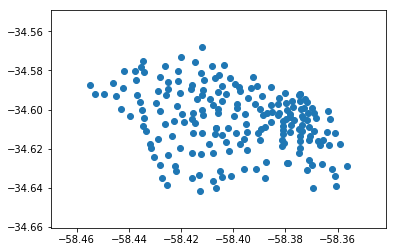

In [4]:
plt.scatter(
    x=df.long,
    y=df.lat)
plt.show()

Se contruye un grafo a partir de las distancias entre las estaciones de bicicletas. Asumiendo que existe una restricción temporal en el uso de las bicicletas, se tomo como arista todas aquellas distancias que no superaran lo 2 km de distancia entre sí.

In [5]:
g = nx.Graph()

for estacion in df.nro_est:
    estacion_base = df[df.nro_est == estacion]
    print('\nCalculando distancias para estacion: %s... \n' % estacion_base.nombre)
    
    for i, estacion2 in enumerate(df.nro_est):
        sys.stdout.write('\r %s / 199' % (i+1))
        sys.stdout.flush()
        estacion_target = df[df.nro_est == estacion2]
        
        dist = haversine(
            lat1=estacion_base.lat.values,
            lon1=estacion_base.long.values,
            lat2=estacion_target.lat.values,
            lon2=estacion_target.long.values
        )
        #print('\n %s' % estacion_base.nombre.values[0])
        #print('\n %s' % dist[0])
        #print(g)
        if dist < 2:
            
            g.add_edge(
                estacion_base.nombre.values[0],
                estacion_target.nombre.values[0],
                distance=dist[0]
            )
            
    print('\n dist_%s DONE! \n' % estacion_base.nombre.values[0])


Calculando distancias para estacion: 0    Facultad de Derecho
Name: nombre, dtype: object... 

 199 / 199
 dist_Facultad de Derecho DONE! 


Calculando distancias para estacion: 1    Retiro
Name: nombre, dtype: object... 

 199 / 199
 dist_Retiro DONE! 


Calculando distancias para estacion: 2    Aduana
Name: nombre, dtype: object... 

 199 / 199
 dist_Aduana DONE! 


Calculando distancias para estacion: 3    Plaza Roma
Name: nombre, dtype: object... 

 199 / 199
 dist_Plaza Roma DONE! 


Calculando distancias para estacion: 4    Parque Lezama
Name: nombre, dtype: object... 

 199 / 199
 dist_Parque Lezama DONE! 


Calculando distancias para estacion: 5    Plaza Italia
Name: nombre, dtype: object... 

 199 / 199
 dist_Plaza Italia DONE! 


Calculando distancias para estacion: 6    Obelisco
Name: nombre, dtype: object... 

 199 / 199
 dist_Obelisco DONE! 


Calculando distancias para estacion: 7    Congreso
Name: nombre, dtype: object... 

 199 / 199
 dist_Congreso DONE! 


Calculando 

 199 / 199
 dist_Ecuador DONE! 


Calculando distancias para estacion: 65    Venezuela
Name: nombre, dtype: object... 

 199 / 199
 dist_Venezuela DONE! 


Calculando distancias para estacion: 66    Reconquista
Name: nombre, dtype: object... 

 199 / 199
 dist_Reconquista DONE! 


Calculando distancias para estacion: 67    Malabia
Name: nombre, dtype: object... 

 199 / 199
 dist_Malabia DONE! 


Calculando distancias para estacion: 68    Carlos Gardel
Name: nombre, dtype: object... 

 199 / 199
 dist_Carlos Gardel DONE! 


Calculando distancias para estacion: 69    Yatay
Name: nombre, dtype: object... 

 199 / 199
 dist_Yatay DONE! 


Calculando distancias para estacion: 70    Pasco
Name: nombre, dtype: object... 

 199 / 199
 dist_Pasco DONE! 


Calculando distancias para estacion: 71    Balcarce
Name: nombre, dtype: object... 

 199 / 199
 dist_Balcarce DONE! 


Calculando distancias para estacion: 72    Moreno
Name: nombre, dtype: object... 

 199 / 199
 dist_Moreno DONE! 


Calcul

 199 / 199
 dist_Las Casas DONE! 


Calculando distancias para estacion: 130    Pinzón
Name: nombre, dtype: object... 

 199 / 199
 dist_Pinzón DONE! 


Calculando distancias para estacion: 131    Cabello
Name: nombre, dtype: object... 

 199 / 199
 dist_Cabello DONE! 


Calculando distancias para estacion: 132    Ministerio de Justicia y Seguridad
Name: nombre, dtype: object... 

 199 / 199
 dist_Ministerio de Justicia y Seguridad DONE! 


Calculando distancias para estacion: 133    Federico Lacroze
Name: nombre, dtype: object... 

 199 / 199
 dist_Federico Lacroze DONE! 


Calculando distancias para estacion: 134    Ruy Díaz de Guzmán
Name: nombre, dtype: object... 

 199 / 199
 dist_Ruy Díaz de Guzmán DONE! 


Calculando distancias para estacion: 135    Rivadavia y 9 de Julio
Name: nombre, dtype: object... 

 199 / 199
 dist_Rivadavia y 9 de Julio DONE! 


Calculando distancias para estacion: 136    Plaza Cecilia Grierson
Name: nombre, dtype: object... 

 199 / 199
 dist_Plaza Cecil

 199 / 199
 dist_Juncal DONE! 


Calculando distancias para estacion: 191    Quintino Bocayuva
Name: nombre, dtype: object... 

 199 / 199
 dist_Quintino Bocayuva DONE! 


Calculando distancias para estacion: 192    Estados Unidos y Boedo
Name: nombre, dtype: object... 

 199 / 199
 dist_Estados Unidos y Boedo DONE! 


Calculando distancias para estacion: 193    Hospital Sardá
Name: nombre, dtype: object... 

 199 / 199
 dist_Hospital Sardá DONE! 


Calculando distancias para estacion: 194    Hospital Argerich
Name: nombre, dtype: object... 

 199 / 199
 dist_Hospital Argerich DONE! 


Calculando distancias para estacion: 195    Congreso II
Name: nombre, dtype: object... 

 199 / 199
 dist_Congreso II DONE! 


Calculando distancias para estacion: 196    Roseti
Name: nombre, dtype: object... 

 199 / 199
 dist_Roseti DONE! 


Calculando distancias para estacion: 197    Austria y French
Name: nombre, dtype: object... 

 199 / 199
 dist_Austria y French DONE! 


Calculando distancias para

In [6]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

# of edges: 4698
# of nodes: 199


In [7]:
nodes = [i for i in g.nodes]
attr = {}
for node in nodes:
    pos = df.loc[df.nombre == node, ['lat', 'long']].values.tolist()
    lat = pos[0][0]
    long = pos[0][1]
    node_atr = {
        'lat': lat,
        'long': long
    }
    
    attr[node] = node_atr 
    
nx.set_node_attributes(
    g,
    attr
)

# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['long'], node[1]['lat']) for node in g.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items())[0:5])

{'Facultad de Derecho': (-58.392452073017, -34.5831330757635),
 'Retiro': (-58.3748217877563, -34.5925888097729),
 'Parque Las Heras': (-58.4071446712567, -34.5839145725724),
 'Plaza Vicente López': (-58.388948867519595, -34.5931772798824),
 'Plaza Houssay': (-58.3985214522976, -34.599189849214696)}

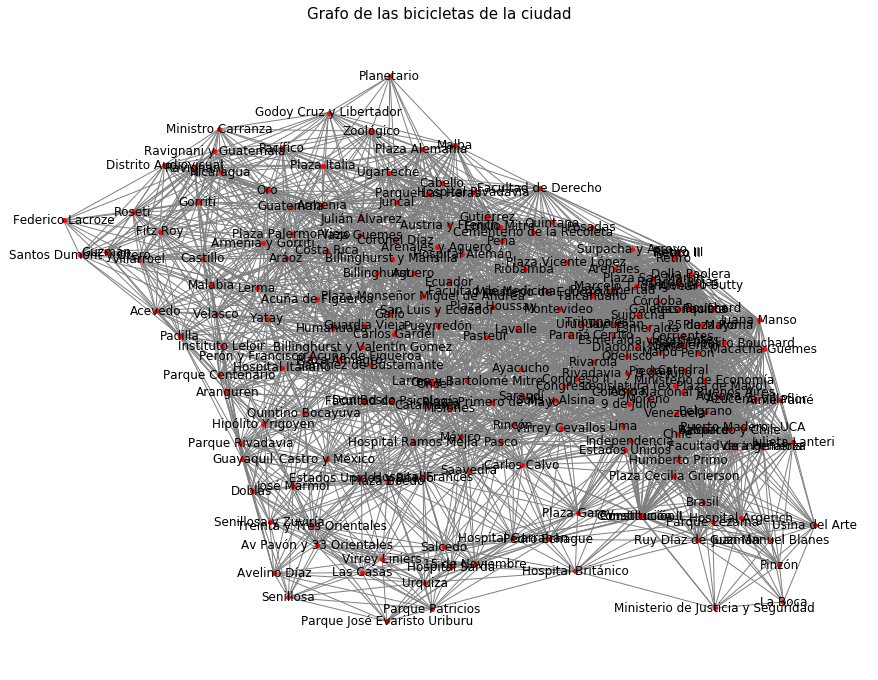

In [8]:
plt.figure(figsize=(12, 9))
nx.draw(
    g,
    with_labels=True,
    pos=node_positions, 
    edge_color='grey', 
    node_size=15, 
    node_color='red'
)

plt.title('Grafo de las bicicletas de la ciudad', size=15)
plt.show()

A continuación se calcula el recorrido más corto entre dos puntos de la ciudad utilizando el algoritmo de Dijkstra.

In [9]:
shortpath = nx.dijkstra_path(g, source='Planetario', target='La Boca', weight='distance')
print('recorrido dijkstra ponderado por la distancia:', shortpath)

recorrido dijkstra ponderado por la distancia: ['Planetario', 'Malba', 'Emilio Mitre', 'Montevideo', '9 de Julio', 'Brasil', 'La Boca']
